In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('./data/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [19]:
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])
# tfidf = TfidfVectorizer(decode_error='ignore')
# X = tfidf.fit_transform(df['data'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [21]:
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))
# model = AdaBoostClassifier()
# model.fit(X_train, y_train)
# print("train score:", model.score(X_train, y_train))
# print("test score:", model.score(X_test, y_test))

train score: 0.994106616662202
test score: 0.9766177270255574


In [24]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

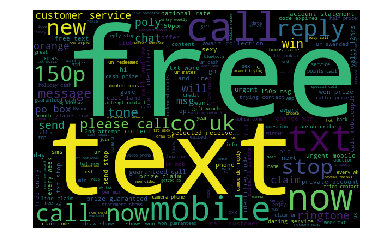

In [25]:
visualize('spam')

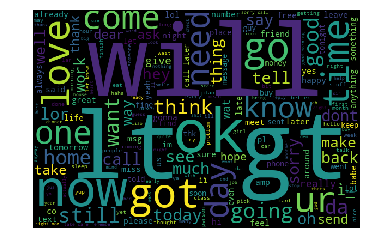

In [26]:
visualize('ham')

In [28]:
df['predictions'] = model.predict(X)
df.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [31]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print('--')
    print(msg)

--
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
--
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
--
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
--
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
--
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
--
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
--
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
--
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Informati

In [32]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print('--')
    print(msg)

--
Waiting for your call.
--
Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctargg. Ctagg. ie you
--
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
--
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
--
Check wid corect speling i.e. Sarcasm
--
Ambrith..madurai..met u in arun dha marrge..remembr?
--
Hi kindly give us back our documents which we submitted for loan from STAPATI
--
\Si.como no?!listened2the plaid album-quite gd&the new air1 which is hilarious-also boughtåÓbraindanceåÓa comp.ofstuff on aphexåÕs ;abel
--
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
--
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
--
I know complain num only..bettr directly go to bsnl offc nd apply for it..
--
Mostly sports type..lyk footbl,crckt..
--
staff.science.nus.edu.sg/~phyhcmk/t